In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataset
dataset = pd.read_csv("01-Logistic Regression.csv")
dataset.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [3]:
# missing data
dataset.isnull()
# dataset.isnull().sum()
# (dataset.isnull().sum()/dataset.shape[0])*100
# (dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

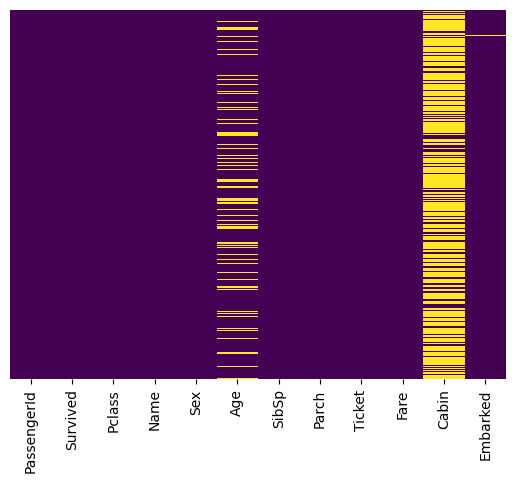

In [4]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# dataset["Age"].mode()[0]
dataset['Age'] = dataset["Age"].fillna(dataset["Age"].mode()[0])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\Ali\AppData\Local\Temp\ipykernel_20220\3798990170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=dataset,palette='RdBu_r')


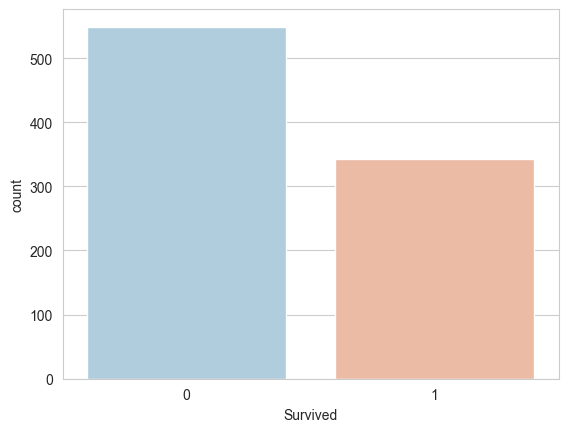

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=dataset,palette='RdBu_r')
plt.show()

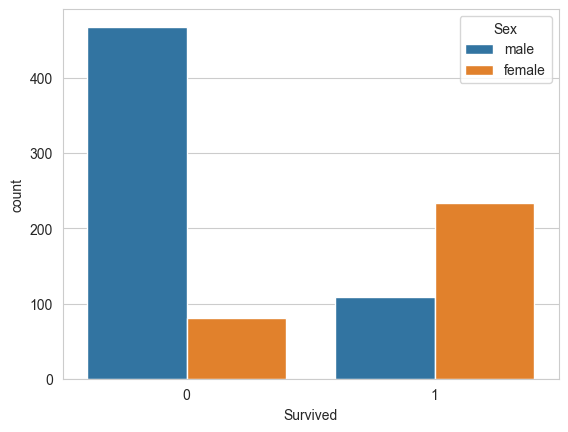

In [9]:
sns.countplot(x="Survived", hue="Sex", data=dataset)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

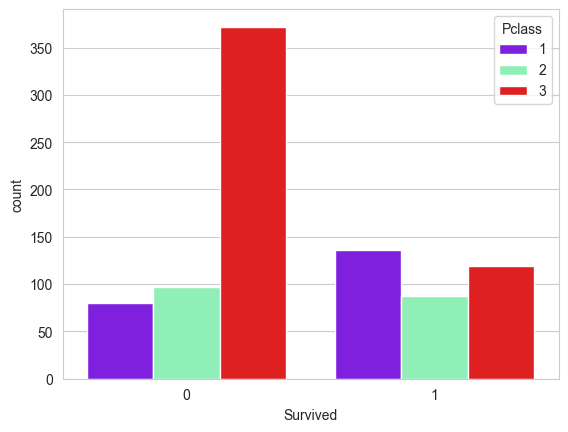

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset,palette='rainbow')

<Axes: ylabel='Frequency'>

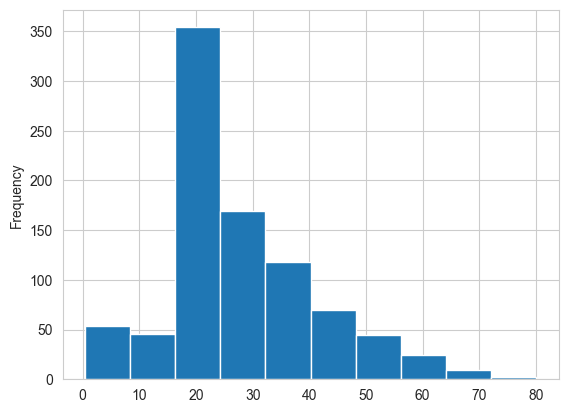

In [11]:
dataset["Age"].plot.hist()

<Axes: xlabel='SibSp', ylabel='count'>

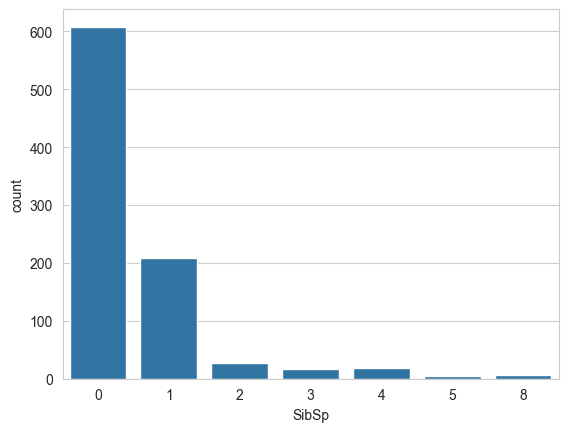

In [12]:
sns.countplot(x='SibSp',data=dataset)

<Axes: >

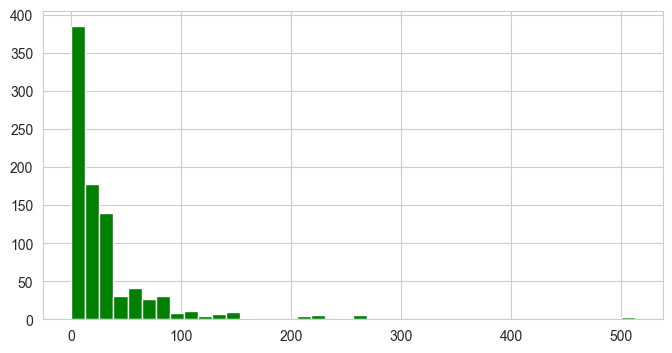

In [13]:
dataset['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [14]:
dataset.drop("Cabin", axis=1, inplace=True)

In [15]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
sex = pd.get_dummies(dataset["Sex"], drop_first=True)
sex.head(2)

male
0   True
1  False

In [17]:
embark = pd.get_dummies(dataset["Embarked"], drop_first=True)
embark.head(3)

Q      S
0  False   True
1  False  False
2  False   True

In [18]:
pcl = pd.get_dummies(dataset["Pclass"], drop_first=True)
pcl.columns = ['P2', 'P3']
pcl.head(3)

P2     P3
0  False   True
1  False  False
2  False   True

In [19]:
dataset = pd.concat([dataset, sex, embark, pcl], axis = 1)
dataset.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked   male      Q      S     P2  \
0      0         A/5 21171   7.2500        S   True  False   True  False   
1      0          PC 17599  71.2833        C  False  False  False  False   
2      0  STON/O2. 3101282   7.9250        S  False  False   True  False   

      P3  
0   True  
1  False  
2   True

In [20]:
deleteddata = dataset.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket"], axis=1, inplace=True)

In [21]:
dataset.head(5)

Survived  Pclass   Age  SibSp  Parch     Fare   male      Q      S     P2  \
0         0       3  22.0      1      0   7.2500   True  False   True  False   
1         1       1  38.0      1      0  71.2833  False  False  False  False   
2         1       3  26.0      0      0   7.9250  False  False   True  False   
3         1       1  35.0      1      0  53.1000  False  False   True  False   
4         0       3  35.0      0      0   8.0500   True  False   True  False   

      P3  
0   True  
1  False  
2   True  
3  False  
4   True

In [22]:
dataset['male'] = dataset['male'].astype(int)
dataset['Q'] = dataset['Q'].astype(int)
dataset['S'] = dataset['S'].astype(int)
dataset['P2'] = dataset['P2'].astype(int)
dataset['P3'] = dataset['P3'].astype(int)

In [23]:
X = dataset.drop("Survived", axis=1)
Y = dataset["Survived"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = lr.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Accuracy: 0.7723880597014925
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.65      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



Confusion Matrix:
 [[132  21]
 [ 40  75]]


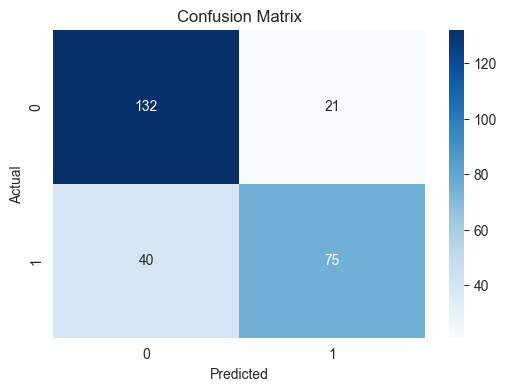

In [30]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
from matplotlib.colors import ListedColormap

C:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ali\AppData\Local\Temp\ipykernel_20220\1725588723.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


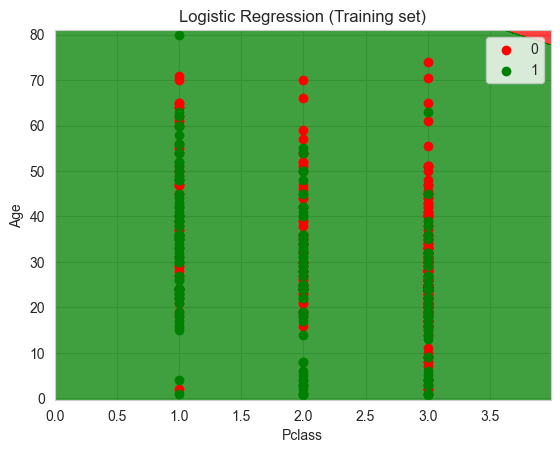

C:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Ali\AppData\Local\Temp\ipykernel_20220\1725588723.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


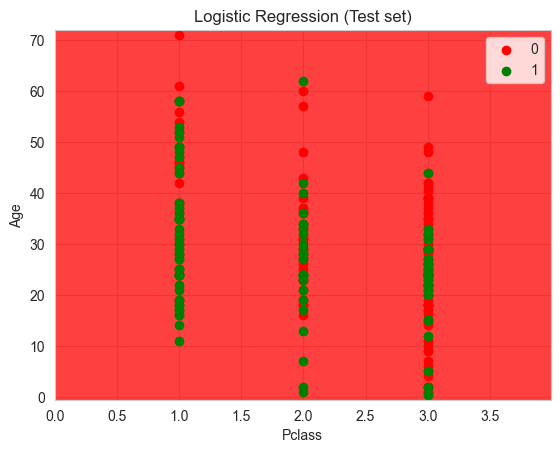

In [32]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    feature_names = X.columns.tolist()
    
    # Convert X and y to numpy arrays
    X_set, y_set = X.values, y.values
    
    # Create a meshgrid of points to plot the decision boundary
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    
    # Predict the class labels for the meshgrid points
    Z = classifier.predict(np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(X_set.shape[1]-2)]).T)
    Z = Z.reshape(X1.shape)
    
    # Plot the contour plot with the decision boundary and training data points
    plt.contourf(X1, X2, Z, alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    
    # Set limits and labels
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    
    # Plot the actual data points
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    
    # Add title and legend
    plt.title(title)
    plt.legend()
    
    # Show plot
    plt.show()

plot_decision_boundary(X_train, y_train, lr, 'Logistic Regression (Training set)')
plot_decision_boundary(X_test, y_test, lr, 'Logistic Regression (Test set)')